In [1]:
# importing all necessary package for EDA.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # Adds nice background to graphs
%matplotlib inline

In [2]:
# loading data into pandas dataframe with added na_values for checking non standard missing values or incorrect imputation
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv",na_values=["n/a", "na", "--","??"])

In [3]:
# Checking number of record of data
df.shape

(5000, 14)

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# checking data type and Non-Null value count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# Analyzing distribution of various attributes.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Insights:**
- `From Above we see that 'Experience' column have negative values.`

In [7]:
# counting number of rows with negative values for 'Experience' variable
len(df[df['Experience']<0]) 
# we can either drop the row with negative value or can impute the values but before that We need to analze data skewness
# that i will do shortly

52

In [8]:
# Now checking number of missing values in dataframe
pd.DataFrame(df.isnull().sum(),columns=["Number of missing values"])

,Number of missing values
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


- `There is no missing value found in dataframe`

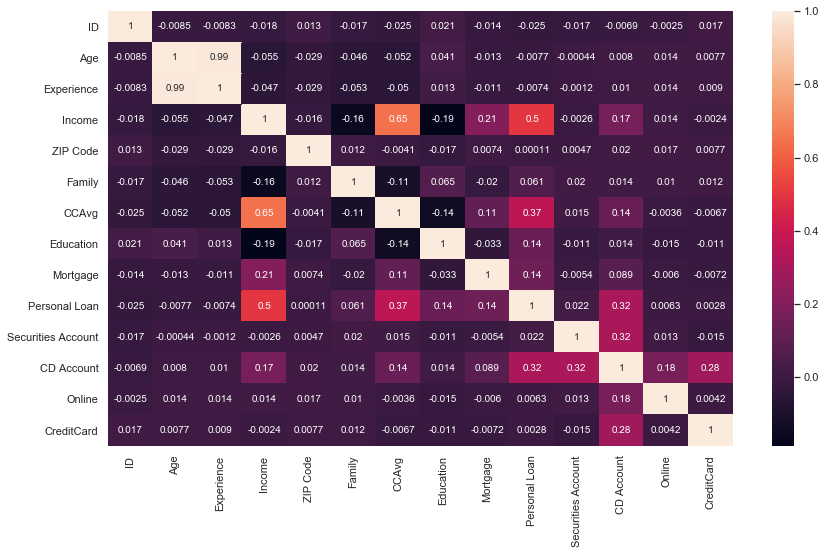

In [9]:
# calculating correlation among numerical values and displaying that using heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

- `From above we can say that we have strong positive correlation between Age and experience.`
- `CCAvg and Income have good positive relationship, if income increases monthly credit card spending increses. That's quite intuitinve `

In [10]:
# findind correlation of independant variable with dependant variable
df.corr()['Personal Loan']

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

- `None of the variable have strong correlation with target variable that is with Personal Loan`
- `Income and CCAvg have fair positive correlation with Personal Loan`

### Lets perform Univariate analysis of each variable

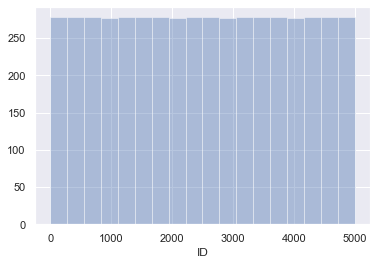

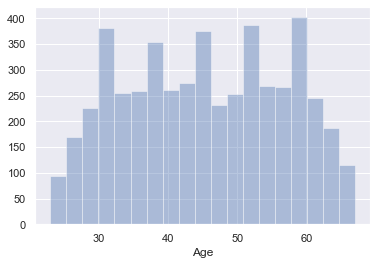

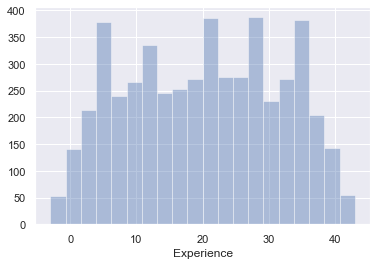

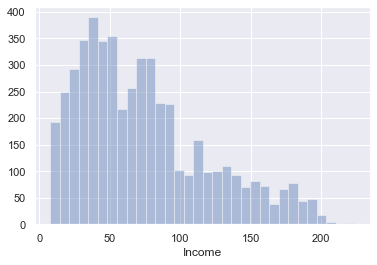

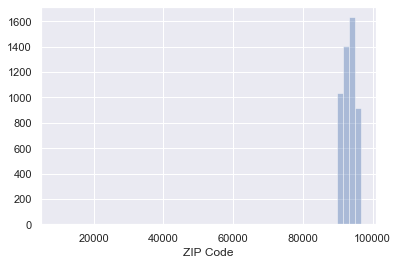

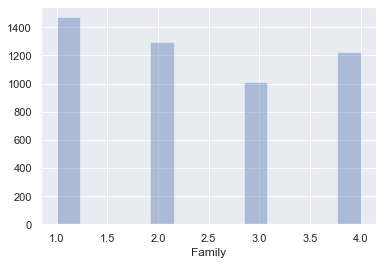

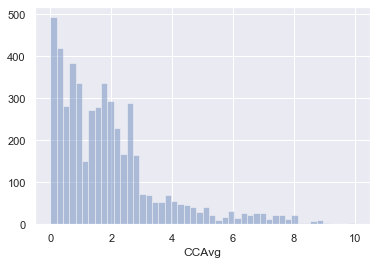

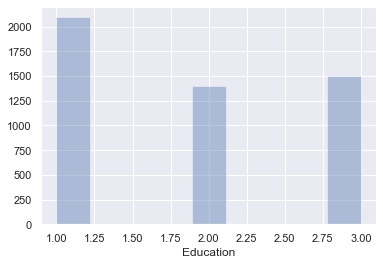

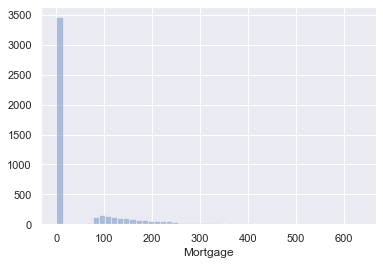

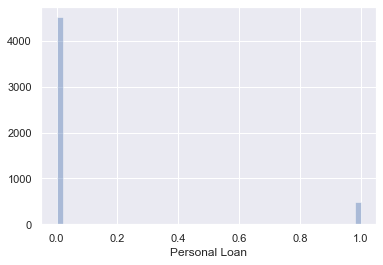

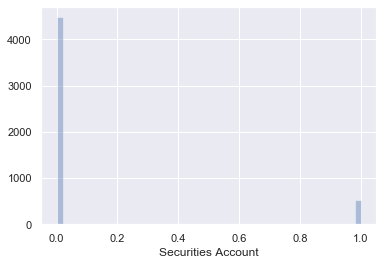

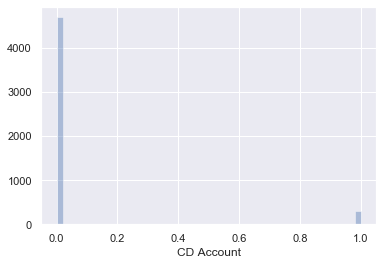

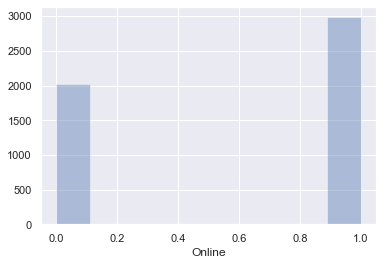

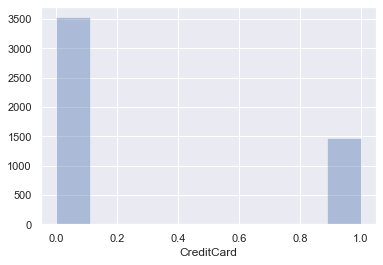

In [11]:
# Performing univariate analysis for each variable
for i in df.columns:
    sns.distplot(df[i],kde=False)
    plt.show()

- `from above univariate analysis, we can say that Income and CCAvg have right skewed data but we should not treat this data becasue banks usually have skewed data`
- `Experience data is looks kind of bimodal and bit left skewed.`

In [12]:
# Checking number of unique values to check if there is any bad data
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [13]:
# Checking the number of people with zero mortgage
len(df[df['Mortgage'] == 0])

3462

In [14]:
# checking credit card spend per month
len(df[df['CCAvg'] == 0])

106

In [15]:
# converting dependant varaible as categorical varaibale to be recognized by model
df['Personal Loan'] = df['Personal Loan'].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   int64   
 11  CD Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(12)
memory usage: 512.9 KB


In [17]:
# calculating data distribution for target variable
df['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

### Perform bivariate analysis between target variable and independant variable

In [18]:
pd.crosstab(df['Personal Loan'],df['Online'],normalize='columns')

Online,0,1
Personal Loan,,
0,0.90625,0.90248
1,0.09375,0.09752


**Insights:**
- `People who use internet banking have better chance of accepting personal loan offer`

In [19]:
pd.crosstab(df['Personal Loan'],df['CreditCard'],normalize='columns')

CreditCard,0,1
Personal Loan,,
0,0.904533,0.902721
1,0.095467,0.097279


**Insights:**
- `Here not much of difference between people have credit card or not in terms of accepting personal loan offer`

In [20]:
pd.crosstab(df['Personal Loan'],df['Education'],normalize='columns')

Education,1,2,3
Personal Loan,,,
0,0.95563,0.870278,0.863424
1,0.04437,0.129722,0.136576


**Insights:**
- `Acceptance rate of personal loan offer with Grduate and Advanced degree holder is high`

In [21]:
pd.crosstab(df['Personal Loan'],df['Securities Account'],normalize='columns')

Securities Account,0,1
Personal Loan,,
0,0.906208,0.885057
1,0.093792,0.114943


**Insights:**
- `Customer having Securities account having better rate of acceptance of personal loan`

In [22]:
pd.crosstab(df['Personal Loan'],df['CD Account'],normalize='columns')

CD Account,0,1
Personal Loan,,
0,0.927629,0.536424
1,0.072371,0.463576


**Insights:**
- `Customer having CD Account have high rate of acceptance of personal loan offer`

In [23]:
# Checking for data distribution for target variable
df['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

- `Only 9% of customers accepted the personal loan offer in last campaign`

In [24]:
# calculating data distribution among ZIP codes.
df['ZIP Code'].value_counts(normalize=True)

94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
96145    0.0002
94970    0.0002
94598    0.0002
90068    0.0002
94087    0.0002
Name: ZIP Code, Length: 467, dtype: float64

In [25]:
# dropping 'ID' column as it is all the unique value and this column wont provide any insight to build a model
# Zip Code represents region and region wise distribution of customers are very low 
# as there in just 5000 customers, therefore dropping 'ZIP Code'
df.drop(['ID','ZIP Code'],axis=1,inplace=True )  

In [26]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


### Need to perform data imputation for Experience column for negative values

In [27]:
len(df[df['Experience']<0]) # there are 52 rows with negative value

52

In [28]:
df['Experience'].mean()

20.1046

In [29]:
df['Experience'].mode()

0    32
dtype: int64

**Insights:**
- `From here we can say that, data is left skewed, so we can impute negative value with mode`

In [30]:
# But as we have only 52 rows we can look for complete rows of data with Experience <0
df[df['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


- `By looking at above data, we can say that imputing negative value with mean or mode is not good idea because value of mean and mode is 20 and 32 respectively whereas Age value for all these rows are less that 30, which is much higher for a person under age of 30.`

- `In that case we replace negative value with zero`

In [31]:
# replacing all rows with Experince < 0 with zero.
df.replace(to_replace={"Experience" : {-1:0,-2:0,-3:0}},inplace=True)

In [32]:
df[df['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


- `No rows with Experience less than zero years`

In [33]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## <a id = "link6"></a> Model building using Logistic Regression from Sklearn 

We will use the sklearn library to build the model and make predictions

In [34]:
# import the sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [35]:
# defining Independant and dependant variable
X = df.drop(['Personal Loan'],axis=1) # Indepedant variable 
Y = df['Personal Loan'] # dependant variable

In [36]:
#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [37]:
# used liblinear solver for better model performance because liblinear is a good choice for small dataset
logreg = LogisticRegression(random_state=42,max_iter=100,solver='liblinear')

In [38]:
logreg.fit(X_train,y_train) # fit the model on training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# Predicting target variable on test data
y_predict = logreg.predict(X_test)

In [40]:
# Observe the predicted and observed classes in a dataframe
z = X_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
1501,30,4,35,2,0.3,2,0,1,0,0,1,0,0
2586,47,23,149,4,6.1,1,0,0,0,0,1,1,0
2653,30,5,121,2,3.1,1,408,0,0,1,0,0,0
1055,31,6,62,1,1.0,1,0,1,0,1,0,0,0
705,62,36,30,3,0.7,2,0,0,0,1,0,0,0


In [41]:
print("Training accuracy",logreg.score(X_train,y_train)) # calculating tarining/in sample accuracy
print()
print("Testing accuracy",logreg.score(X_test,y_test)) # calculating testing/out of sample accuracy


Training accuracy 0.9511428571428572

Testing accuracy 0.9486666666666667


- `from above accuracy on testing data we can say that model performed better on testing data and it does not underfit the model`

Text(48.5, 0.5, 'Predicted')

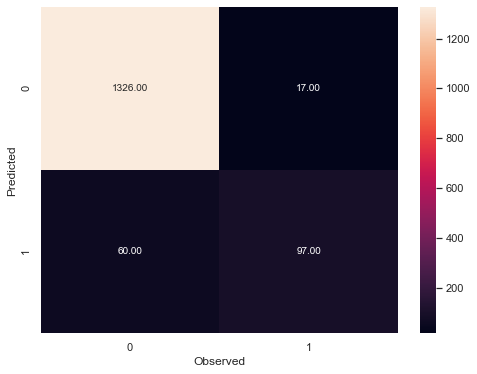

In [42]:
# creating confusion matrix and displaying with heat map for better presentation
cm = metrics.confusion_matrix(y_test,y_predict)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Observed')
plt.ylabel('Predicted')

In [43]:
# calculating all evaluation metrics to evaluate the model performance.
print("Accuracy score: ",metrics.accuracy_score(y_test,y_predict))
print()
print("Recall score: ",metrics.recall_score(y_test,y_predict))
print()
print("Precision score :",metrics.precision_score(y_test,y_predict))
print()
print("F1 Score: ",metrics.f1_score(y_test,y_predict))
print()
print("Roc Auc Score",metrics.roc_auc_score(y_test,y_predict))

Accuracy score:  0.9486666666666667

Recall score:  0.6178343949044586

Precision score : 0.8508771929824561

F1 Score:  0.7158671586715868

Roc Auc Score 0.8025880835281788


**Insights:**
- `From accuracy score we can say that 94% of time model correctly classified the sample`
- `From Recall score we can say that customers who actually accepted the personal loan offer out of which how many model labeled as True and looks model did perform well`
- `From Precision score we can say that we have low false positive rate. It tells that how many customers actually accepted the personal loan offer out of all customers who labeled as accepted the personal loan offer. Looks model performed good enough`


In [44]:
# Finding coefficient of all the attributes.
for idx,name in enumerate(X_test.columns):
    print("Column {} and coefficient is {}".format(name,logreg.coef_[0][idx]))

Column Age and coefficient is -0.38604563291802213
Column Experience and coefficient is 0.39260030444595634
Column Income and coefficient is 0.04849068197512145
Column Family and coefficient is 0.6210741642583367
Column CCAvg and coefficient is 0.10583170974895777
Column Education and coefficient is 1.5675861677099678
Column Mortgage and coefficient is 0.0007821051514945561
Column Securities Account and coefficient is -0.7527415172938134
Column CD Account and coefficient is 3.1134241500481865
Column Online and coefficient is -0.5198710618903224
Column CreditCard and coefficient is -1.0313953795822501


In [45]:
# calulating coefficient for all columns and displaying in tabular format with respective column name.
df_coef = pd.DataFrame()
df_coef['Column'] = X_train.columns
df_coef['Coefficient'] = np.round(logreg.coef_[0],3)
df_coef

,Column,Coefficient
0,Age,-0.386
1,Experience,0.393
2,Income,0.048
3,Family,0.621
4,CCAvg,0.106
5,Education,1.568
6,Mortgage,0.001
7,Securities Account,-0.753
8,CD Account,3.113
9,Online,-0.520


In [46]:
# Dispalying rows where predicted value differe from observed data.
z[z['Observed Personal Loan'] != z['Predicted Personal Loan']]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
2586,47,23,149,4,6.1,1,0,0,0,0,1,1,0
29,38,13,119,1,3.3,2,0,0,1,1,1,1,0
4628,27,1,130,3,2.9,2,0,0,0,0,0,1,0
227,47,23,148,2,7.5,1,0,0,1,1,1,0,1
4439,33,7,104,2,3.6,3,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,48,23,84,4,3.1,2,0,1,1,1,0,1,0
1097,50,24,188,3,1.3,1,184,0,0,0,1,1,0
183,29,3,148,3,4.1,1,0,0,0,1,0,1,0
321,44,20,101,3,4.4,2,82,0,0,0,0,1,0


- ` There are 79 rows data where predicted value differ from actual personal loan value`

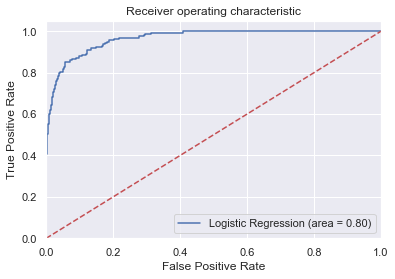

In [47]:
# Creating a ROC AUC Curve
logit_roc_auc = metrics.roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc);
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## <a id = "link8"></a>Business Insights 

##### `Important Features`

Based on the coefficients value, looks that "Family", "Education","Secutities Account" and "Creditcard" features influnce the model performance.

- From accuracy score we can say that almost 95% of time model correctly classified the sample
- From Recall score we can say that customers who actually accepted the personal loan offer out of which how many model labeled as True and looks model did perform well
- From Precision score we can say that we have low false positive rate. It tells that how many customers actually accepted the personal loan offer out of all customers who labeled as accepted the personal loan offer. Looks model performed fair enough


##### `Important Metric`

Here the bank wants to give Personal loan to the people who are actually eligible  i.e. **less number of False Positive**, if FP is high bank would lose money. So that the bank doesn't lose money on the people who are not eligible for the personal loan. Hence **Precision is the important metric**.

In case of False negative bank will lose few customers but that okay because the bank would want to retain money more than customers who are not eligible for loan.

Here **Precision is 85%**, that is a good score.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who will say yes for the personnel loan. They can use the model for upcoming customers.